# ***SL on PPO model recorded data on 64 episode***

In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import gc
import psutil
import os

In [3]:
# Function to read a large pickle file
def read_large_pkl(file_path):
    try:
        # Open the pickle file in binary read mode
        with open(file_path, 'rb') as file:
            # Deserialize the content from the file
            data = pickle.load(file)
        return data
    except Exception as e:
        print(f"Error reading pickle file: {e}")
        return None

In [4]:
# Function to clear used memory
def clear_memory(data=None):
    try:
        # Delete the large data object (if exists) to free memory
        if data is not None:
            del data
        
        # Trigger garbage collection
        gc.collect()

        # Optional: Use psutil to check memory usage
        memory_info = psutil.virtual_memory()
        print(f"Memory after cleanup: {memory_info.percent}% used")

        print("Memory cleared successfully!")
    except Exception as e:
        print(f"Error clearing memory: {e}")

In [5]:
file_path = '/Users/divyansh/Downloads/data.pkl'

In [6]:
# Step 1: Check initial memory usage
memory_info_before = psutil.virtual_memory()
print(f"Initial memory usage: {memory_info_before.percent}% used")

# Step 2: Load the data from pickle file
data = read_large_pkl(file_path)

# Step 3: Check memory usage after loading data
memory_info_after_loading = psutil.virtual_memory()
print(f"Memory usage after loading data: {memory_info_after_loading.percent}% used")

# Step 4: Optionally, print or process the data
print(f"Data loaded successfully, length: {len(data)}" if isinstance(data, (list, dict)) else "Data loaded successfully.")

# Step 5: Clear memory after processing
clear_memory(data)

Initial memory usage: 46.1% used
Memory usage after loading data: 46.6% used
Data loaded successfully, length: 7
Memory after cleanup: 46.6% used
Memory cleared successfully!


In [7]:

# Step 6: Check memory usage again after clearing memory
memory_info_after_cleanup = psutil.virtual_memory()
print(f"Memory usage after cleanup: {memory_info_after_cleanup.percent}% used")

Memory usage after cleanup: 46.6% used


In [8]:
df = pd.DataFrame(data)

In [9]:
df.columns

Index(['states', 'actions', 'rewards', 'next_states', 'timestamps', 'episodes',
       'steps'],
      dtype='object')

In [10]:
df['rewards'].sum()

802.5659863945443

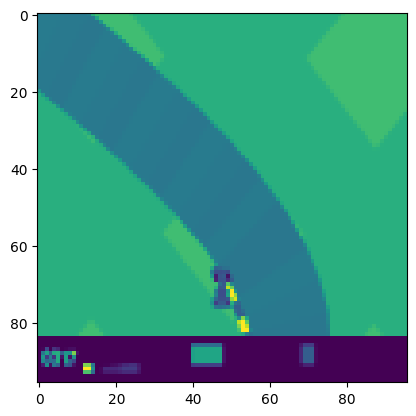

In [22]:
plt.imshow(df['states'][100][2])

In [ ]:
import pickle

# Path to your pickle file
pkl_file_path = '/Users/divyansh/Downloads/data.pkl'

def load_episode_by_index(pkl_file_path, episode_index):
    with open(pkl_file_path, 'rb') as f:
        # Loop through the file until reaching the desired episode
        for i in range(episode_index):
            try:
                # Skip episodes until we reach the requested one
                pickle.load(f)
            except EOFError:
                # If we've reached the end before the requested episode
                print(f"End of file reached before episode {episode_index}.")
                return None
        
        # Load the requested episode (episode_index is zero-based)
        episode_data = pickle.load(f)
        return episode_data

# Load episode 40 (0-based index, so episode 40 is index 39)
episode_40 = load_episode_by_index(pkl_file_path, 39)

if episode_40:
    print(f"Episode 40 loaded successfully!")
    print(episode_40)  # You can now process or analyze this specific episode
else:
    print("Failed to load episode 40.")


Episode 40 loaded successfully!
{'states': [array([[[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]],

       [[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1

In [ ]:
df = pd.DataFrame(episode_40)